<a href="https://colab.research.google.com/github/Growth-Hackers-SNU/sandbox-youtube-anlaysis/blob/main/code/deeplevel/DunDunDance(%EC%9D%8C%EC%A0%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab을 가정하고 쓰여진 코드

## 기본 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
import pickle 

import matplotlib.pyplot as plt

In [ ]:
! pip install kiwipiepy

     |████████████████████████████████| 3.7MB 7.5MB/s 
     |████████████████████████████████| 57.3MB 81kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.9.0-cp37-none-any.whl size=57496291 sha256=05f7de0b41ad6678d427aa17d3dfc30a4fe397244cc3605ac520f326729c55a1
  Stored in directory: /root/.cache/pip/wheels/61/19/a2/f85a7031e0ff829231b4562e6460a84fef599080bbb2573ef7
Successfully built kiwipiepy-model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 사용할 데이터 셋 commentA, commentB, commentC Test Set은 사용하지 않습니다. Validation Set만 하기에도 부족한 걸 
Youtube_comment_label = pd.read_csv("/content/drive/Shareddrives/[GH x Sandbox]/최종분류/sample_final.csv", index_col = 1)
Youtube_comment_label = Youtube_comment_label[['comment', 'class']]
Youtube_comment_label.head()

,comment,class
index,,
1,흠.. 일단 전 안맞을래요,7
2,자식새끼 키워봤자 아무소용업다..,7
3,방테나ㅋㅋㅋ,2
4,하람님 저고민있어욧!!\n노래잘부르고싶은데..어떻게하면 잘 부를수있을까요?오늘도 영...,1
5,희재도 준비하고있고 발표예정이예요\n다시 확인해주세요 모두 준비하고있어요 계약때문에...,7


## 데이터 전처리 및 준비



In [ ]:
# 7번 클래스 -> 0으로 처리 : 나중에 편합니다.
Youtube_comment_label.loc[Youtube_comment_label['class'] ==  7, 'class'] = 0
Youtube_comment_label.head()

,comment,class
index,,
1,흠.. 일단 전 안맞을래요,0
2,자식새끼 키워봤자 아무소용업다..,0
3,방테나ㅋㅋㅋ,2
4,하람님 저고민있어욧!!\n노래잘부르고싶은데..어떻게하면 잘 부를수있을까요?오늘도 영...,1
5,희재도 준비하고있고 발표예정이예요\n다시 확인해주세요 모두 준비하고있어요 계약때문에...,0


In [ ]:
# 각 라벨 갯수가 균형된 데이터 셋, 그냥 raw한 데이터 셋 두 개씩 클래스 3개, 7개 총 4가지 데이터 셋을 만들 겁니다.
Youtube_comment_label3 = Youtube_comment_label.copy()
Youtube_comment_label7 = Youtube_comment_label.copy()
Youtube_comment_label3_balance = Youtube_comment_label.copy()
Youtube_comment_label7_balacne = Youtube_comment_label.copy()

# Youtube_comment_label3
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  1, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  2, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  3, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  4, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  5, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  6, 'class'] = 2
Youtube_comment_label3 = Youtube_comment_label3.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label3.head())
print(f"총 데이터 갯수 : {len(Youtube_comment_label3_balance['comment'])}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7
Youtube_comment_label7 # 더 건드릴 것이 없다
Youtube_comment_label7 = Youtube_comment_label7_balacne.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label7.head())
print(f"총 데이터 갯수 : {len(Youtube_comment_label7['comment'])}")
print("-------------------------------------------------------------------------------------------")


# Youtube_comment_label3_balance
Youtube_comment_label3_balance = Youtube_comment_label3.copy()
min_class_num = Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label3_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(3):
  Youtube_comment_label3_balance_df = Youtube_comment_label3_balance_df.append(Youtube_comment_label3_balance.loc[Youtube_comment_label3_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label3_balance = Youtube_comment_label3_balance_df.reset_index(drop = True)
print(Youtube_comment_label3_balance.head())
print(f"각 class 별로 맞춰진 균형 갯수는 : {min_class_num}")
print(f"총 데이터 갯수 : {len(Youtube_comment_label3_balance['comment'])} = 3(class 갯수) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7_balance
Youtube_comment_label7_balance = Youtube_comment_label7.copy()
min_class_num = Youtube_comment_label7_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label7_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(7):
  Youtube_comment_label7_balance_df = Youtube_comment_label7_balance_df.append(Youtube_comment_label7_balance.loc[Youtube_comment_label7_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label7_balance = Youtube_comment_label7_balance_df.reset_index(drop = True)
print(Youtube_comment_label7_balance.head())
print(f"각 class 별로 맞춰진 균형 갯수는 : {min_class_num}")
print(f"총 데이터 갯수 : {len(Youtube_comment_label7_balance['comment'])} = 7(class 갯수) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

                                             comment  class
0                                     흠.. 일단 전 안맞을래요      0
1                                    0:18 KITA 책 ㅋㅋㅋ      0
2  0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...      0
3                                          꼬..꼬끼오..?      0
4                  난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄      0
총 데이터 갯수 : 22000
-------------------------------------------------------------------------------------------
                                             comment  class
0                                     흠.. 일단 전 안맞을래요      0
1                                    0:18 KITA 책 ㅋㅋㅋ      0
2  0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...      0
3                                          꼬..꼬끼오..?      0
4                  난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄      0
총 데이터 갯수 : 22000
-------------------------------------------------------------------------------------------
                          comment class
0                     

In [ ]:
Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()

2954

In [ ]:
X_train = Youtube_comment_label3[['comment']]
X_train

,comment
0,흠.. 일단 전 안맞을래요
1,0:18 KITA 책 ㅋㅋㅋ
2,0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...
3,꼬..꼬끼오..?
4,난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄
...,...
21995,그남들 능지 수준이 어디까지 낮아진거임 ...
21996,지금은 21세기이고 충분히 문명이 발달하였습니다. 개 말고도 개를 대체할 수 있는 ...
21997,이게 머라고 조회수가 높은거냐?ㅋㅋㅋ
21998,아니 진짜.......어이없다... 진짜 약속 하나 안지키고 촬영을 해? 아니 그걸...


## 토큰화
> 토큰화를 진행해봅시다  
> 각자 맡은 바를 생각하면,  
> 단어 토큰화 : Kiwi Tokenizer 사용, 토큰화 그대로 가져갈지 몇개 버릴지 등 은 직접 선택  
> 음절 토큰화 : 그냥 나누면 됩니다.  
> 자모 토큰화 : h2j 어쩌구 package 있는데 찾아보시면 됩니다. 

> 저는 첫 번째 데이터 셋만으로 진행해 보겠습니다.

In [ ]:
X_data, Y_label = Youtube_comment_label3['comment'], Youtube_comment_label3['class']
X_data.head()

0                                       흠.. 일단 전 안맞을래요
1                                      0:18 KITA 책 ㅋㅋㅋ
2    0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...
3                                            꼬..꼬끼오..?
4                    난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄
Name: comment, dtype: object

In [ ]:
X_data

0                                           흠.. 일단 전 안맞을래요
1                                          0:18 KITA 책 ㅋㅋㅋ
2        0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...
3                                                꼬..꼬끼오..?
4                        난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄
                               ...                        
21995                            그남들 능지 수준이 어디까지 낮아진거임 ...
21996    지금은 21세기이고 충분히 문명이 발달하였습니다. 개 말고도 개를 대체할 수 있는 ...
21997                                 이게 머라고 조회수가 높은거냐?ㅋㅋㅋ
21998    아니 진짜.......어이없다... 진짜 약속 하나 안지키고 촬영을 해? 아니 그걸...
21999                      새엄마랑 동생은 무슨 재연배우 수준도 안되는 연기;;;;
Name: comment, Length: 22000, dtype: object

In [ ]:
def tokenization(texts):
  max_len = 0
  tokenized_texts = []
  word2idx = {}
  # Add <pad> and <unk> tokens to the vocabulary
  word2idx['<pad>'] = 0
  word2idx['<unk>'] = 1
  # Building our vocab from the corpus starting from index 2
  idx = 2
  for j in range(len(texts)):
    tokenized = []
    try:
      for i in range(len(texts[j])):
        if texts[j][i] != ' ':         
          tokenized.append(texts[j][i])
      tokenized_texts.append(tokenized)
    
  # Add new token to `word2idx`
      for token in tokenized:
        if token not in word2idx:
          word2idx[token] = idx
          idx += 1

  # Update `max_len`
      max_len = max(max_len, len(tokenized))
    except TypeError:
      tokenized = ['']
      tokenized_texts.append(tokenized)
      pass

  

  return tokenized_texts,  word2idx, max_len

#encode는 위 tokenize와 동일하게 진행
def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        len_sen = len(tokenized_sent)
        if len_sen < max_len :
            tokenized_sent += ['<pad>'] * (max_len - len_sen)

        # Encode tokens to input_ids
        
        input_id = [word2idx.get(token) for token in tokenized_sent[:50]] # 여기서 20은 단어가 20개보다 많으면 끊는 것임니다.
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
tokenization(Youtube_comment_label3['comment'][3132])

([['우'],
  ['리'],
  [':'],
  ['i'],
  ['t'],
  ['\n'],
  ['떵'],
  ['개'],
  [':'],
  ['e'],
  ['a'],
  ['t']],
 {'\n': 7,
  ':': 4,
  '<pad>': 0,
  '<unk>': 1,
  'a': 11,
  'e': 10,
  'i': 5,
  't': 6,
  '개': 9,
  '떵': 8,
  '리': 3,
  '우': 2},
 1)

In [ ]:
tokenized_texts, word2idx, max_len = tokenization(X_data)

In [ ]:
word2idx

{'<pad>': 0,
 '<unk>': 1,
 '흠': 2,
 '.': 3,
 '일': 4,
 '단': 5,
 '전': 6,
 '안': 7,
 '맞': 8,
 '을': 9,
 '래': 10,
 '요': 11,
 '0': 12,
 ':': 13,
 '1': 14,
 '8': 15,
 'K': 16,
 'I': 17,
 'T': 18,
 'A': 19,
 '책': 20,
 'ㅋ': 21,
 '5': 22,
 '음': 23,
 '초': 24,
 '기': 25,
 '에': 26,
 '6': 27,
 '세': 28,
 '이': 29,
 '상': 30,
 '아': 31,
 '스': 32,
 '트': 33,
 '라': 34,
 '제': 35,
 '한': 36,
 '것': 37,
 '도': 38,
 '그': 39,
 '러': 40,
 '고': 41,
 '면': 42,
 '역': 43,
 '력': 44,
 '더': 45,
 '높': 46,
 '은': 47,
 '학': 48,
 '생': 49,
 '접': 50,
 '종': 51,
 '하': 52,
 '는': 53,
 '확': 54,
 '실': 55,
 '히': 56,
 '품': 57,
 '질': 58,
 '의': 59,
 '차': 60,
 '가': 61,
 '있': 62,
 '건': 63,
 '꼬': 64,
 '끼': 65,
 '오': 66,
 '?': 67,
 '난': 68,
 '빨': 69,
 '랐': 70,
 '다': 71,
 '를': 72,
 "'": 73,
 '발': 74,
 '렸': 75,
 '로': 76,
 '봤': 77,
 '네': 78,
 '잘': 79,
 '못': 80,
 '보': 81,
 '정': 82,
 '말': 83,
 '내': 84,
 '축': 85,
 '구': 86,
 '인': 87,
 '줄': 88,
 '양': 89,
 '적': 90,
 '어': 91,
 'ㅡ': 92,
 '드': 93,
 '럼': 94,
 '원': 95,
 '거': 96,
 '게': 97,
 '나': 98,
 '록': 99,
 '

In [ ]:
tokenized_texts

[['흠', '.', '.', '일', '단', '전', '안', '맞', '을', '래', '요'],
 ['0', ':', '1', '8', 'K', 'I', 'T', 'A', '책', 'ㅋ', 'ㅋ', 'ㅋ'],
 ['0',
  ':',
  '5',
  '5',
  '음',
  '초',
  '기',
  '에',
  '6',
  '5',
  '세',
  '이',
  '상',
  '아',
  '스',
  '트',
  '라',
  '제',
  '한',
  '한',
  '것',
  '도',
  '그',
  '러',
  '고',
  '이',
  '것',
  '도',
  '면',
  '역',
  '력',
  '더',
  '높',
  '은',
  '학',
  '생',
  '아',
  '스',
  '트',
  '라',
  '접',
  '종',
  '하',
  '는',
  '것',
  '도',
  '그',
  '러',
  '고',
  '.',
  '.',
  '.',
  '.',
  '확',
  '실',
  '히',
  '품',
  '질',
  '의',
  '차',
  '이',
  '가',
  '있',
  '는',
  '건',
  '가',
  '.',
  '.',
  '.'],
 ['꼬', '.', '.', '꼬', '끼', '오', '.', '.', '?'],
 ['난',
  '빨',
  '랐',
  '다',
  '를',
  "'",
  '발',
  '렸',
  '다',
  "'",
  '로',
  '봤',
  '네',
  'ㅋ',
  'ㅋ',
  'ㅋ',
  '잘',
  '못',
  '보',
  '고',
  '정',
  '말',
  '내',
  '내',
  '축',
  '구',
  '인',
  '줄'],
 ['고', '기', '양', '이', '적', '어', '요', '.', '.', 'ㅡ'],
 ['아',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '드',
  '럼',
  '은',
  '원',
  '래',
  '거',

In [ ]:
vocab_size = len(word2idx.items()) # 단어랑 단어의 인덱스를 연결해주는 사전 
vocab_size# 2513 : 총 토큰화 된 단어 갯수

2967

In [ ]:
max_len # 댓글 중 길이가 가장 긴거 == 1591, 우리는 이대로 사용하지 않고 앞의 50개를 끊고 사용할 겁니다
# 물론 앞의 50개만 보는게 정석은 아닙니다.

4110

In [ ]:
X_data_encode = encode(tokenized_texts, word2idx, 50) # 20자리에 원래 max_len 이긴 합니다
print(len(X_data_encode)) # 댓글 11000 개가 각각 50 차원짜리 정수 인코딩이 완료된 것 확인
X_data_encode

22000


array([[2, 3, 3, ..., 0, 0, 0],
       [12, 13, 14, ..., 0, 0, 0],
       [12, 13, 22, ..., 40, 41, 3],
       ...,
       [29, 97, 300, ..., 0, 0, 0],
       [31, 134, 130, ..., 7, 453, 71],
       [280, 272, 169, ..., 0, 0, 0]], dtype=object)

In [ ]:
X_data_encode[10000]

array([61, 324, 197, 25, 5, 29, 78, 146, 371, 363, 610, 711, 87, 113, 31,
       184, 128, 434, 343, 175, 38, 131, 391, 47, 774, 34, 26, 125, 367,
       71, 53, 97, 29, 175, 61, 7, 61, 45, 100, 146, 39, 410, 97, 434,
       343, 52, 42, 371, 363, 236], dtype=object)

In [ ]:
X_data_encode.shape

(22000, 50)

> 위 방법으로 키위 토큰화 -> 직접 Vocab 및 정수 인코딩 하는 방법은 kiwi_tokenize 안에 kiwi.analyze가 내장되어 있어서 불용어 등 현진이 형이 했던 추가 전처리를 못합니다.  
> 이를 하고 싶으면 함수를 튜닝하세요. 설명은 간략하게 써놨습니다

> 자 여기까지 하면 토큰화 완료, 음절이나 자모 단위로 하면 아마 차원이 훨씬 크겠네요.

## 임베딩
> 이제 임베딩을 해봅시다
> 임베딩은 크게 3가지가 있었습니다.
1. 모델을 세울때 임베딩 층을 넣는 것(이때는 주로 freeze 하지 않고 임베딩도 학습하게 합니다)
2. gensim 의 Word2Vec, FastText 등 을 사용해서 pre-trained 시키고 그거 사용하기
3. 온라인 상의 pre-trained 가져와서 하기.

### 1. 임베딩 층 그냥 넣어보기

In [ ]:
X_data_encode

array([[2, 3, 3, ..., 0, 0, 0],
       [12, 13, 14, ..., 50, 51, 52],
       [55, 56, 57, ..., 0, 0, 0],
       ...,
       [65, 146, 31, ..., 0, 0, 0],
       [274, 9, 131, ..., 20, 109, 3],
       [752, 135, 233, ..., 0, 0, 0]], dtype=object)

In [ ]:
import tensorflow as tf
Y_label_encode = tf.keras.utils.to_categorical(Y_label, num_classes = 3)

In [ ]:
X_data_encode = np.asarray(X_data_encode).astype('float32')

In [ ]:
X_data_encode

array([[  2.,   3.,   3., ...,   0.,   0.,   0.],
       [ 12.,  13.,  14., ...,  50.,  51.,  52.],
       [ 55.,  56.,  57., ...,   0.,   0.,   0.],
       ...,
       [ 65., 146.,  31., ...,   0.,   0.,   0.],
       [274.,   9., 131., ...,  20., 109.,   3.],
       [752., 135., 233., ...,   0.,   0.,   0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Youtube, X_Val_Youtube, Y_train_Youtube, Y_Val_Youtube = train_test_split(X_data_encode, Y_label_encode, test_size=0.20, random_state=33)

> LSTM 기본 모델

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
LSTM_model_inside_Embedding = Sequential()
LSTM_model_inside_Embedding.add(Embedding(vocab_size, 30)) #여기서 30은 각 단어 마다 30차원으로 임베딩 하겠다는 것을 의미.
LSTM_model_inside_Embedding.add(LSTM(32))
LSTM_model_inside_Embedding.add(BatchNormalization())
LSTM_model_inside_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_inside_Embedding.add(Dense(3, activation = 'softmax'))# 여기서 3은 최종 라벨 갯수
LSTM_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# 학습은 안됩니다. ㅋ

Epoch 1/30
275/275 - 10s - loss: 0.8713 - acc: 0.6211 - val_loss: 0.8541 - val_acc: 0.6405
Epoch 2/30
275/275 - 2s - loss: 0.7442 - acc: 0.7002 - val_loss: 0.7773 - val_acc: 0.6809
Epoch 3/30
275/275 - 2s - loss: 0.6798 - acc: 0.7316 - val_loss: 0.7632 - val_acc: 0.6814
Epoch 4/30
275/275 - 2s - loss: 0.6086 - acc: 0.7574 - val_loss: 0.7636 - val_acc: 0.6855
Epoch 5/30
275/275 - 2s - loss: 0.5507 - acc: 0.7810 - val_loss: 1.1407 - val_acc: 0.4668
Epoch 6/30
275/275 - 2s - loss: 0.5189 - acc: 0.7991 - val_loss: 0.9458 - val_acc: 0.6295
Epoch 7/30
275/275 - 2s - loss: 0.4912 - acc: 0.8103 - val_loss: 0.8986 - val_acc: 0.6591
Epoch 8/30
275/275 - 2s - loss: 0.4743 - acc: 0.8194 - val_loss: 0.9775 - val_acc: 0.6745
Epoch 9/30
275/275 - 2s - loss: 0.4437 - acc: 0.8290 - val_loss: 0.9354 - val_acc: 0.6359
Epoch 10/30
275/275 - 2s - loss: 0.4240 - acc: 0.8407 - val_loss: 0.9449 - val_acc: 0.6700
Epoch 11/30
275/275 - 2s - loss: 0.4083 - acc: 0.8505 - val_loss: 0.9625 - val_acc: 0.6723
Epoch 1

> CNN 모델 : 소원이꺼 보고 텐서 플로로 바꿨는데 잘 모르겠습니다.

In [ ]:
CNN_input = tf.keras.Input(shape = (50,))
Embedded = Embedding(vocab_size, 100)(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 70, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 70, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 70, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 100)      251200      input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 100, 50)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 100, 70)      10570       permute[0][0]                    
______________________________________________________________________________________________

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/30
275/275 - 29s - loss: 6.6887 - acc: 0.5155 - val_loss: 6.6231 - val_acc: 0.5391
Epoch 2/30
275/275 - 2s - loss: 7.0590 - acc: 0.5336 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 3/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 4/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 5/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 6/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 7/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 8/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 9/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 10/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 11/30
275/275 - 2s - loss: 7.2953 - acc: 0.5337 - val_loss: 6.9601 - val_acc: 0.5391
Epoch 1

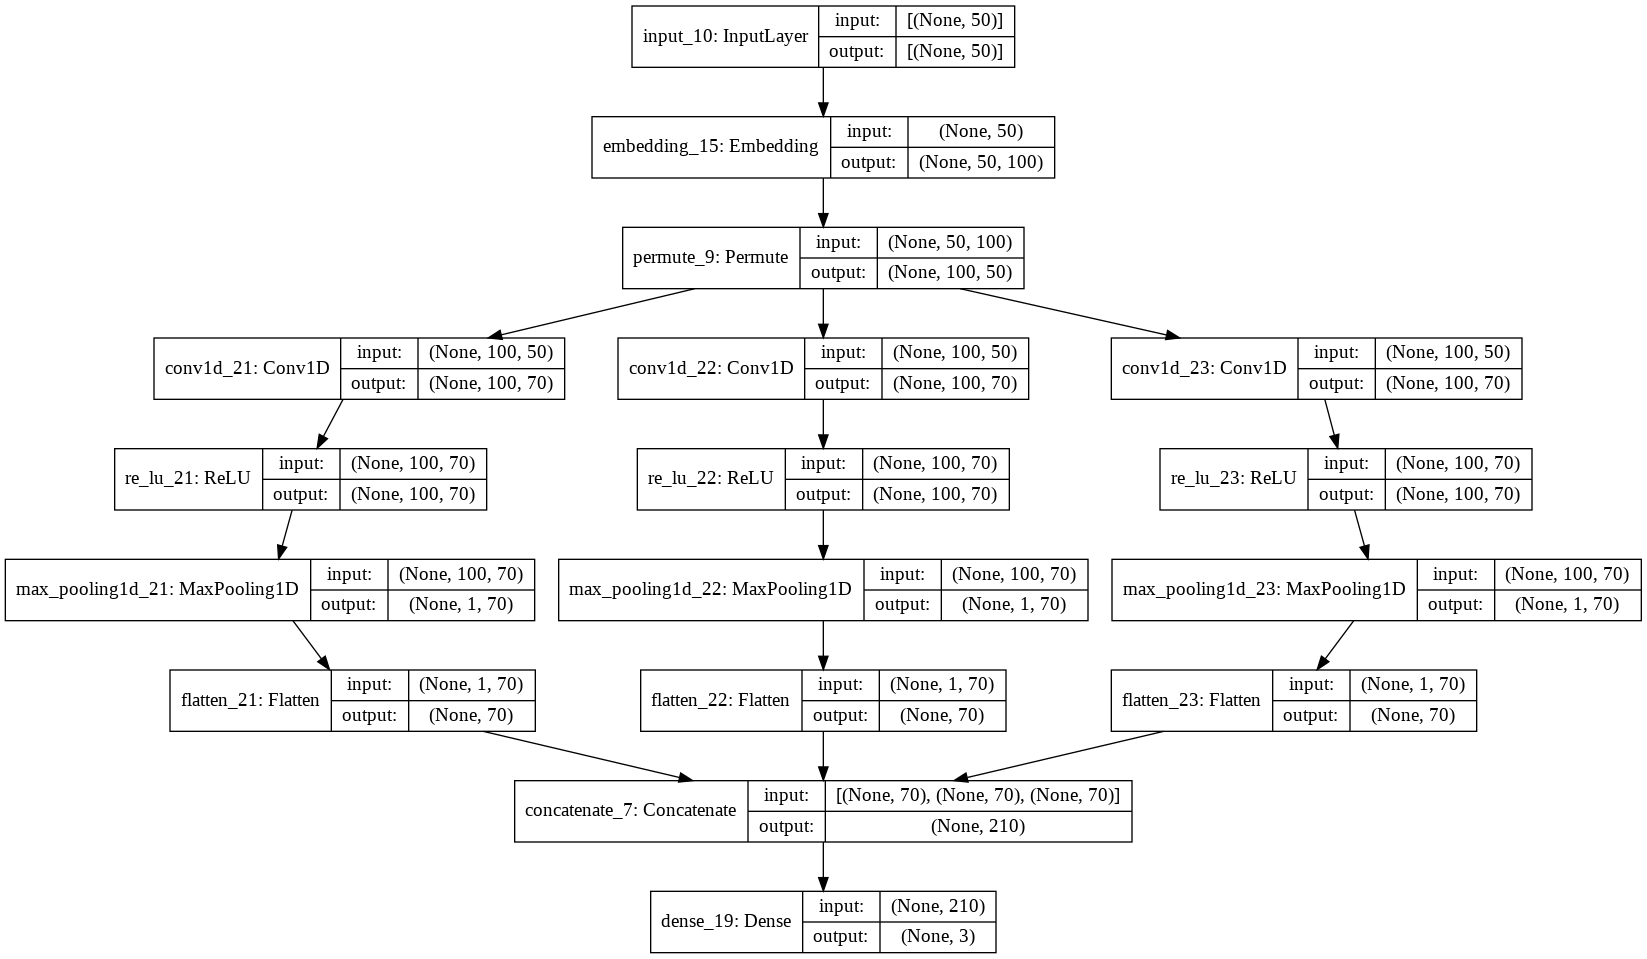

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)

### 2. Pre-trained 가져다 쓰기

> LSTM 기본 모델

In [ ]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.
    
    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    # Initilize random embeddings
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings

In [ ]:
word2idx

{'<pad>': 0,
 '<unk>': 1,
 '흠': 2,
 '.': 3,
 '일': 4,
 '단': 5,
 '전': 6,
 '안': 7,
 '맞': 8,
 '을': 9,
 '래': 10,
 '요': 11,
 '이': 12,
 '강': 13,
 '인': 14,
 '은': 15,
 '밴': 16,
 '투': 17,
 '호': 18,
 '에': 19,
 '서': 20,
 '포': 21,
 '지': 22,
 '션': 23,
 '벤': 24,
 '치': 25,
 ',': 26,
 '\n': 27,
 'K': 28,
 '리': 29,
 '거': 30,
 '는': 31,
 '월': 32,
 '드': 33,
 '컵': 34,
 '같': 35,
 '큰': 36,
 '무': 37,
 '대': 38,
 '경': 39,
 '쟁': 40,
 '력': 41,
 '없': 42,
 '어': 43,
 '짜': 44,
 '피': 45,
 '때': 46,
 '해': 47,
 '외': 48,
 '파': 49,
 '다': 50,
 '쓰': 51,
 '고': 52,
 '남': 53,
 '자': 54,
 '근': 55,
 '데': 56,
 '선': 57,
 '바': 58,
 '님': 59,
 '스': 60,
 '튜': 61,
 '디': 62,
 '오': 63,
 '사': 64,
 '하': 65,
 '신': 66,
 '건': 67,
 '가': 68,
 '영': 69,
 '?': 70,
 '유': 71,
 '브': 72,
 '만': 73,
 '보': 74,
 '넘': 75,
 '궁': 76,
 '금': 77,
 '여': 78,
 'ㅠ': 79,
 '체': 80,
 'ㅋ': 81,
 '터': 82,
 '의': 83,
 '세': 84,
 '릭': 85,
 '배': 86,
 '우': 87,
 '분': 88,
 '상': 89,
 '꾸': 90,
 '준': 91,
 '히': 92,
 '연': 93,
 '재': 94,
 '되': 95,
 '려': 96,
 '면': 97,
 '동': 98,
 '생': 99,
 

In [ ]:
# Tok
# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, '/content/drive/Shareddrives/[GH x Sandbox]/reference_data/cc.ko.300.vec')
#embeddings = torch.tensor(embeddings)

Loading pretrained vectors...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



There are 1949 / 2513 pretrained vectors found.


In [ ]:
embeddings.shape

(2513, 300)

In [ ]:
embeddings

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0212999 , -0.00745255, -0.2444739 , ...,  0.11583346,
        -0.12281369,  0.24556409],
       [-0.0277    , -0.1189    ,  0.0975    , ..., -0.1133    ,
         0.1857    ,  0.1988    ],
       ...,
       [ 0.08044983, -0.19484925, -0.18581012, ...,  0.1080426 ,
         0.06882753, -0.07296805],
       [-0.10975676, -0.12608504, -0.01761771, ...,  0.10337235,
        -0.23266059, -0.09654196],
       [ 0.0323    ,  0.0368    , -0.0038    , ..., -0.0564    ,
        -0.0235    , -0.0194    ]])

In [ ]:
LSTM_model_pretrained_Embedding = Sequential()
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=50, trainable=False)
LSTM_model_pretrained_Embedding.add(trained_embedding)
#LSTM_model_pretrained_Embedding.add(Embedding(vocab_size, 50)) #여기서 30은 각 단어 마다 30차원으로 임베딩 하겠다는 것을 의미.
LSTM_model_pretrained_Embedding.add(LSTM(32))
LSTM_model_pretrained_Embedding.add(BatchNormalization())
LSTM_model_pretrained_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_pretrained_Embedding.add(Dense(3, activation = 'softmax'))# 여기서 3은 최종 라벨 갯수
LSTM_model_pretrained_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_pretrained_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=30, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))
# 학습은 안됩니다. ㅋ

Epoch 1/30
275/275 - 6s - loss: 0.9255 - acc: 0.5750 - val_loss: 0.8642 - val_acc: 0.6336
Epoch 2/30
275/275 - 4s - loss: 0.8236 - acc: 0.6513 - val_loss: 0.9715 - val_acc: 0.5918
Epoch 3/30
275/275 - 4s - loss: 0.7828 - acc: 0.6736 - val_loss: 0.8135 - val_acc: 0.6486
Epoch 4/30
275/275 - 4s - loss: 0.7493 - acc: 0.6853 - val_loss: 0.7908 - val_acc: 0.6591
Epoch 5/30
275/275 - 4s - loss: 0.7197 - acc: 0.6969 - val_loss: 0.8421 - val_acc: 0.6323
Epoch 6/30
275/275 - 4s - loss: 0.6943 - acc: 0.7125 - val_loss: 0.8049 - val_acc: 0.6264
Epoch 7/30
275/275 - 4s - loss: 0.6753 - acc: 0.7222 - val_loss: 0.8478 - val_acc: 0.6359
Epoch 8/30
275/275 - 4s - loss: 0.6598 - acc: 0.7286 - val_loss: 0.7982 - val_acc: 0.6705
Epoch 9/30
275/275 - 4s - loss: 0.6405 - acc: 0.7359 - val_loss: 0.7748 - val_acc: 0.6709
Epoch 10/30
275/275 - 4s - loss: 0.6252 - acc: 0.7467 - val_loss: 0.8160 - val_acc: 0.6186
Epoch 11/30
275/275 - 4s - loss: 0.6077 - acc: 0.7497 - val_loss: 0.9151 - val_acc: 0.6318
Epoch 12

> CNN

In [ ]:
CNN_input = tf.keras.Input(shape = (50,))
trained_embedding = Embedding(vocab_size, 300, weights=[embeddings], input_length=50, trainable=False)
Embedded = trained_embedding(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 100, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)


CONV2 = Conv1D(filters = 100, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 100, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3)(Merged)

In [ ]:
CNN_model_inside_Embedding = tf.keras.Model(CNN_input, CNN_output)
CNN_model_inside_Embedding.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 50, 300)      753900      input_11[0][0]                   
__________________________________________________________________________________________________
permute_10 (Permute)            (None, 300, 50)      0           embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 300, 100)     15100       permute_10[0][0]                 
____________________________________________________________________________________________

In [ ]:
CNN_model_inside_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model_inside_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=10, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/10
275/275 - 7s - loss: 6.1462 - acc: 0.3480 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 2/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 3/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 4/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 5/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 6/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 7/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 8/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 9/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268
Epoch 10/10
275/275 - 6s - loss: 6.1047 - acc: 0.3327 - val_loss: 6.1102 - val_acc: 0.3268


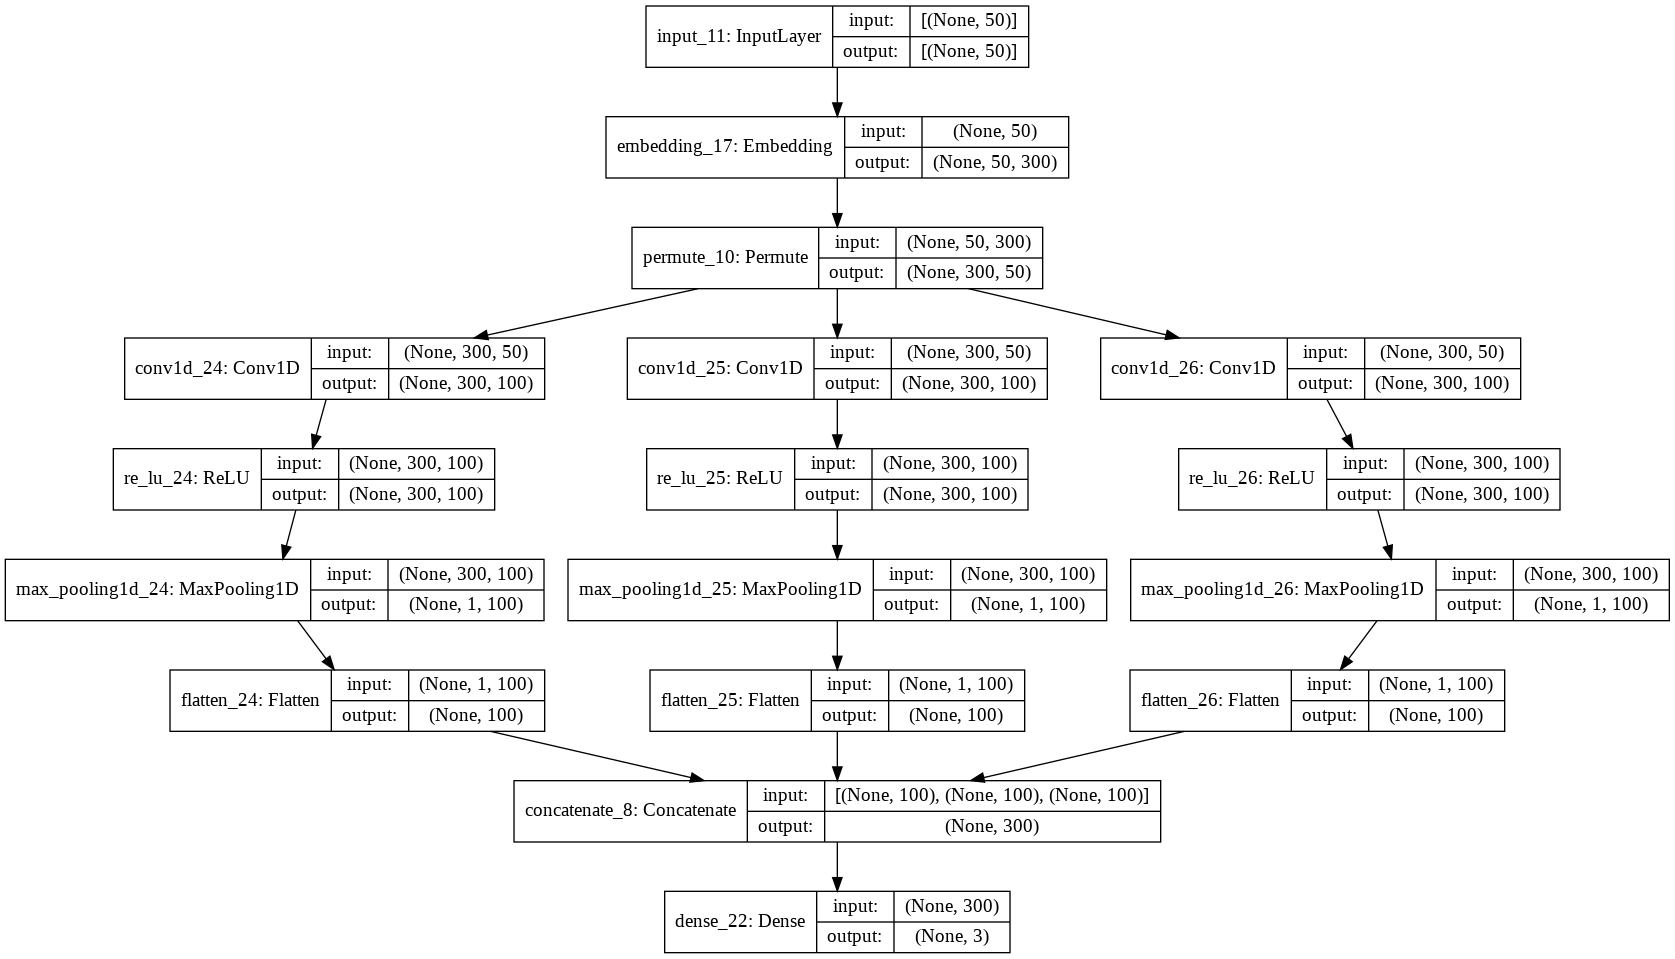

In [ ]:
tf.keras.utils.plot_model(CNN_model_inside_Embedding, "CNN.png", show_shapes=True)

### Fasttext 임베딩 학습시키기

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
data_DIR = "/content/drive/Shareddrives/[GH x Sandbox]/train/"
file_name_num = [4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,51]

files = [f for f in listdir(data_DIR) if isfile(join(data_DIR, f))]
video_stats = [f for f in files if '.csv' in f and 'video' in f]
files = [f for f in files if '.csv' in f and 'comments' in f]
print(files)

df_dict = dict()
for file_name in tqdm(files):
    comment_name = file_name.split('.')[0]
    df = pd.read_csv(data_DIR + file_name, lineterminator='\n')

    df_dict[comment_name] = df

FileNotFoundError: ignored

In [ ]:
whole_df = pd.DataFrame(columns=df_dict['comments_4'].columns)

for category, df in df_dict.items():
    df['category_id'] = int(category.split('_')[1])
    whole_df = pd.concat([whole_df, df], ignore_index=True)

whole_df.tail(10)

,ch_id,ch_title,vid_id,vid_title,comment,likes,reply,published_at,author,category_id
1136000,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),그만큼 옵치가 ㅈ같다는거지~,1,0,2021-03-15T07:05:17Z,UC-hv6fiWQICYeWTIS2NDY2A,51.0
1136001,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),재원님은겐지잘못함,0,0,2021-03-15T08:14:22Z,UCji---Vne7SzpzvS47UI3gA,51.0
1136002,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),옵치 요즘 누가하냐 그 망겜,0,0,2021-03-15T11:08:20Z,UC113nO4yxrgEn1dZ2uTIJDA,51.0
1136003,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),그만큼~그만큼하다는 거지~,2,0,2021-03-15T07:01:54Z,UC9ic-Qk9G5xwYGt3-C2QEzw,51.0
1136004,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),무가 산에가서 하는말은?!?!?!?!?!?\n\n\n\n\n\n무는 말을 못합니다 ...,1,1,2021-03-15T07:03:36Z,UCLeHgPUSrnGE2Doa2q_1Ucg,51.0
1136005,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),김재원 나보다 겐지 못하네,0,0,2021-03-15T07:36:41Z,UC5VPuBYusc_OSmsHsmqx7XQ,51.0
1136006,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),자세히 보기를 누르지마세요\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,0,0,2021-03-15T07:22:09Z,UCDsaz5jOHrveeAbiv3swOAw,51.0
1136007,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),나구독하면 여친생김,1,1,2021-03-15T07:02:26Z,UC5hkMEIYcO7iLrn1A1XLm-g,51.0
1136008,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),재원님 항상 재미있는 영상 만들어 주세요,2,0,2021-03-15T07:01:15Z,UCaaGJ1KOTbvOH4nh-PCzCEA,51.0
1136009,UCta_NRwnsUaew0t3VNxBNyg,김재원의 즐거운 세상,vZrDo5p6uQk,오버워치에서 재연된 무야호 (즐겜워치 33),재원 님 이제 유튜브 그만하시고 접어 보는게 좋을 거 같아요,1,1,2021-03-16T08:09:53Z,UCei5go7g5HpvJIAWhl7MQWg,51.0


In [ ]:
len(whole_df)

1136010

Fast Text Modeling


In [ ]:
from gensim.models import FastText

In [ ]:
whole_df['comment'][1136009]

'재원 님 이제 유튜브 그만하시고 접어 보는게 좋을 거 같아요'

In [ ]:
def token_sentence(texts):
  max_len = 0
  tokenized_texts = []
  word2idx = {}
  # Add <pad> and <unk> tokens to the vocabulary
  word2idx['<pad>'] = 0
  word2idx['<unk>'] = 1
  # Building our vocab from the corpus starting from index 2
  idx = 2
  tokenized = []
  for j in range(len(texts)):
    tokenized.append(texts[j])
  
  

  return tokenized

In [ ]:
token_sentence("안녕 나를 소개하지 내 이름은 이현승 직업은")

['안',
 '녕',
 ' ',
 '나',
 '를',
 ' ',
 '소',
 '개',
 '하',
 '지',
 ' ',
 '내',
 ' ',
 '이',
 '름',
 '은',
 ' ',
 '이',
 '현',
 '승',
 ' ',
 '직',
 '업',
 '은']

In [ ]:
token_sentence(["안녕나는 바보야", "해피 데이 ><"])

['안녕나는 바보야', '해피 데이 ><']

In [ ]:
whole_comment_df = whole_df[['comment']]


In [ ]:
whole_comment_df

,comment
0,아니 정한이 숙소 창문에 x자 대문짝만하게 테이프 붙여놓은거 K 아이돌 - 창문이라...
1,아니 심지어 그 방 윤정한방 창문이 아니라 이지훈방 창문아님 ? ㅋㄲㅋㄱㅋㄱㅋㅋㅋㄱ...
2,이거이거 조사를 열심히 하신건지 이거 캐럿아니면 이렇게 할 수가 없는데..?애들 선...
3,민규랑 정한이 비주얼합 좋은거 알고있었지만 이렇게 보니까 진짜최고네ㅠㅠㅠㅠㅠ 원우랑...
4,5:31 이러다가 서명호 나중에 캐럿들은 정말 유난스러운 존재에요 이러면 어떡함
...,...
1136005,김재원 나보다 겐지 못하네
1136006,자세히 보기를 누르지마세요\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1136007,나구독하면 여친생김
1136008,재원님 항상 재미있는 영상 만들어 주세요


In [ ]:
corpus = whole_comment_df.apply(lambda row : token_sentence(str(row['comment'])), axis=1)
corpus[:10]

0    [아, 니,  , 정, 한, 이,  , 숙, 소,  , 창, 문, 에,  , x, ...
1    [아, 니,  , 심, 지, 어,  , 그,  , 방,  , 윤, 정, 한, 방, ...
2    [이, 거, 이, 거,  , 조, 사, 를,  , 열, 심, 히,  , 하, 신, ...
3    [민, 규, 랑,  , 정, 한, 이,  , 비, 주, 얼, 합,  , 좋, 은, ...
4    [5, :, 3, 1,  , 이, 러, 다, 가,  , 서, 명, 호,  , 나, ...
5    [김, 민, 규, 가,  , 살, 아,  , 움, 직, 인, 다, 는, 것, 에, ...
6    [너, 무,  , 웃, 어, 서,  , 광, 대, 가,  , 아, 프, 다, ., ...
7    [다, 들,  , 느, 꼈, 구, 나, ., ., .,  , 이,  , 영, 상, ...
8    [캐, 럿, 들, 💎,  , 줌, 터, 뷰, 뿐, 만,  , 아, 니, 라,  , ...
9    [디, 에, 잇,  , 섹, 시, 해, .,  , 나,  , 미, 쳐,  , 어, ...
dtype: object

In [ ]:
# 여기서 모델을 좀 Tuning 할 수 있습니당!
model = FastText(size=100, window=3, min_count=10, workers=5, sg=1)
model.build_vocab(sentences=corpus)
model.train(
    sentences=corpus, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

In [ ]:
# save model
model_fDIR = "/content/drive/MyDrive/GH/SandBoxProject/"
model.save(model_fDIR + 'fasttext_eumjul_w3_m10')
model.wv.save_word2vec_format(model_fDIR + 'fasttext_eumjul_w3_m10_vis')

In [ ]:
print(model.wv)

In [ ]:
model.wv.vectors.shape

(3836, 100)

#### 임베딩 테스트

In [ ]:
print((model.wv.most_similar(token_sentence('꿀'), topn=5)))

[('팁', 0.6809545755386353), ('잼', 0.6770281791687012), ('젬', 0.6062765717506409), ('🍯', 0.5760533809661865), ('뀰', 0.5527904033660889)]


#### 학습된 임베딩 불러오기 (여기부터 모듈에 넣을 때 참고하면 될 거 같아요!)


In [ ]:
from gensim.models import KeyedVectors, FastText

In [ ]:
model_fname = "/content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/fasttext/fasttext_eumjul"
embedding_model = FastText.load(model_fname)

In [ ]:
embedding_model.wv.vectors.shape

(5663, 100)

In [ ]:
em

In [ ]:
embedding_model.wv.vocab

{'아': <gensim.models.keyedvectors.Vocab at 0x7f1954e23b50>,
 '니': <gensim.models.keyedvectors.Vocab at 0x7f1954e23b10>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x7f1954e23c50>,
 '정': <gensim.models.keyedvectors.Vocab at 0x7f1954e23cd0>,
 '한': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ec10>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ead0>,
 '숙': <gensim.models.keyedvectors.Vocab at 0x7f1954e2eb50>,
 '소': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ea90>,
 '창': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ebd0>,
 '문': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ecd0>,
 '에': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ed10>,
 'x': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e290>,
 '자': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e810>,
 '대': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e890>,
 '짝': <gensim.models.keyedvectors.Vocab at 0x7f1954e2ed90>,
 '만': <gensim.models.keyedvectors.Vocab at 0x7f1954e2e310>,
 '하': <gensim.models.keyedvectors.Vocab 

In [ ]:
embedding_model.wv.index2word.index('힋')

ValueError: ignored

In [ ]:
embedding_model.wv.vectors('안녕하세요')

TypeError: ignored

In [ ]:
embedding_model.wv.vectors[1013]

array([-0.30530325,  0.19968723, -0.11163443, -0.1396638 ,  0.10069371,
        0.18994814, -0.3397554 ,  0.114188  ,  0.1621604 ,  0.14653426,
       -0.07593415,  0.12150709,  0.06730559, -0.20250212,  0.1736672 ,
       -0.13233522,  0.1160189 , -0.00336763,  0.20723255,  0.0786157 ,
        0.08253931, -0.13539076,  0.07899188,  0.21777172, -0.06046881,
       -0.03492628,  0.0095981 , -0.02268984,  0.13502578,  0.12077362,
        0.15018885,  0.02884118, -0.05255683, -0.183318  ,  0.22369534,
       -0.17409123,  0.26753238, -0.01084949,  0.2526945 ,  0.03261225,
        0.26917425,  0.12348884, -0.4890355 , -0.07588693, -0.01777693,
        0.39007646, -0.1908631 , -0.07258558, -0.01268908,  0.11220203,
        0.07497871,  0.15920672, -0.11521582,  0.22835703,  0.09263802,
       -0.21541692, -0.07168306,  0.05575279, -0.18363813, -0.13798636,
        0.12096624, -0.00120862,  0.16648743,  0.1392301 ,  0.0190138 ,
       -0.01413393,  0.20724823,  0.06221654,  0.06706505, -0.04

In [ ]:
embedding_model.wv.index2word[1013]

'흠'

In [ ]:
embedding_model.wv.index2word.index('흠')

1013

In [ ]:
embedding_model.wv.get_vector('흠')

array([-0.30530325,  0.19968723, -0.11163443, -0.1396638 ,  0.10069371,
        0.18994814, -0.3397554 ,  0.114188  ,  0.1621604 ,  0.14653426,
       -0.07593415,  0.12150709,  0.06730559, -0.20250212,  0.1736672 ,
       -0.13233522,  0.1160189 , -0.00336763,  0.20723255,  0.0786157 ,
        0.08253931, -0.13539076,  0.07899188,  0.21777172, -0.06046881,
       -0.03492628,  0.0095981 , -0.02268984,  0.13502578,  0.12077362,
        0.15018885,  0.02884118, -0.05255683, -0.183318  ,  0.22369534,
       -0.17409123,  0.26753238, -0.01084949,  0.2526945 ,  0.03261225,
        0.26917425,  0.12348884, -0.4890355 , -0.07588693, -0.01777693,
        0.39007646, -0.1908631 , -0.07258558, -0.01268908,  0.11220203,
        0.07497871,  0.15920672, -0.11521582,  0.22835703,  0.09263802,
       -0.21541692, -0.07168306,  0.05575279, -0.18363813, -0.13798636,
        0.12096624, -0.00120862,  0.16648743,  0.1392301 ,  0.0190138 ,
       -0.01413393,  0.20724823,  0.06221654,  0.06706505, -0.04

In [ ]:
len(embedding_model.wv.index2word)  # Index 가 총 5663개 있고, 각각에 대해서 100차원 짜리 벡터가 있음

5663

#### 학습시킨 Fasttext 임베딩 이용하기 

In [ ]:
def sen_to_seq(s_list): # s = ['아', '니']
    seq = list()
    for s in s_list:
        try:
            seq_value = embedding_model.wv.index2word.index(s)+1
        except:
            seq_value = 0 # 없으면 0
        seq.append(seq_value)
    return seq

In [ ]:
sen_to_seq(['아','니'])

[11, 14]

In [ ]:
def seq_padding(seq, max_len):
    if len(seq) < max_len:
        n = max_len - len(seq)
        zero_list = [0] * n
        seq += zero_list
    elif len(seq) > max_len:
        seq = seq[:max_len] 
    
    return seq   

In [ ]:
max_len = max(len(l) for l in corpus)
max_len

NameError: ignored

In [ ]:
embedding_model.wv[corpus.iloc[0]].shape

(79, 100)

In [ ]:
len_distribution = [len(l) for l in corpus]

In [ ]:
np.mean(len_distribution)

39.41910810644273

In [ ]:
import matplotlib.pyplot as plt

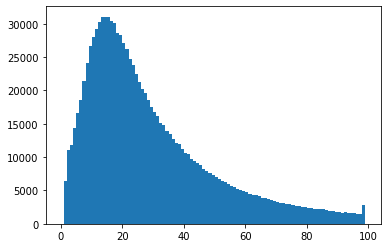

In [ ]:
len_distribution_array = np.array(len_distribution)

plt.hist(len_distribution_array, bins = np.arange(0,100,1))
plt.show()

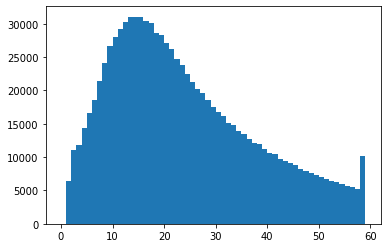

In [ ]:
plt.hist(len_distribution_array, bins = np.arange(0,60,1))
plt.show()

In [ ]:
sentence_len = 50 

문장 길이를 50까지만 보기로 결정했습니다!
이제 embedding matrix 를 만듭니다.

In [ ]:
embedding_matrix = np.zeros((embedding_model.wv.vectors.shape[0]+1, embedding_model.wv.vectors.shape[1]))
np.shape(embedding_matrix)   


(3837, 100)

In [ ]:
for i in tqdm(range(len(embedding_model.wv.vectors))):
    embedding_matrix[i+1] = embedding_model.wv.vectors[i]
    # 0에 대한 값은 -> 0행렬로 넣어주기 위해서 index 에 +1 을 해줍니다.

100%|██████████| 3836/3836 [00:00<00:00, 344289.78it/s]


In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embedding_matrix[5663]

IndexError: ignored

In [ ]:
embedding_model.wv.n_similarity('아 진짜 개빡치네', '이럴거면 걍 방송접어')

0.64313

In [ ]:
embedding_model.wv.n_similarity('아 진짜 개빡치네', '언니 너무 예뻐요')

0.61258745

In [ ]:
token_sentence('흠.. 일단 전 안맞을래요')

['흠', '.', '.', ' ', '일', '단', ' ', '전', ' ', '안', '맞', '을', '래', '요']

In [ ]:
embedding_model.wv.get_vector(',')

array([ 0.04151495, -0.0502139 , -0.09488994,  0.02851121,  0.20007153,
        0.08247532, -0.04942813, -0.04638997,  0.11166716,  0.09268869,
       -0.03043532, -0.02966953,  0.01986593,  0.1729537 , -0.11460082,
        0.05747357,  0.04532105,  0.0218615 ,  0.16682331, -0.067115  ,
        0.01631936,  0.11866426, -0.08496214,  0.21576464, -0.1149644 ,
        0.09657934,  0.00219459, -0.04424432,  0.32723632,  0.15318158,
        0.32439983, -0.13504249, -0.05627093,  0.04001839, -0.01446279,
       -0.2962282 ,  0.33791244, -0.03326362,  0.04049373,  0.00950088,
       -0.03569169, -0.1004917 , -0.15064988,  0.13691275,  0.36932656,
        0.1707112 , -0.04639302,  0.24765217,  0.0448998 ,  0.09447505,
       -0.04396485,  0.07038596,  0.0599113 ,  0.2638981 , -0.18983775,
       -0.15162997,  0.04430728, -0.2645467 ,  0.11424933, -0.25056255,
        0.2375732 , -0.02301529, -0.09413183, -0.05796941, -0.09554956,
        0.03704623,  0.06161044, -0.14052631, -0.08767715,  0.02

In [ ]:
embedding_model.wv.
embedding_model.wv.get_normed_vectors('다 가졌네')

AttributeError: ignored

In [ ]:
embedding_model.wv.get_vector('다 ')

KeyError: ignored

In [ ]:
embedding_model.wv.get_vector('다')

array([ 0.01099458,  0.01133343, -0.04859336,  0.05378448,  0.09905023,
       -0.22136782, -0.01867678, -0.02092658,  0.15843976,  0.24386531,
       -0.084081  , -0.01187846,  0.06753061, -0.07783497,  0.00714025,
        0.01247447,  0.02394754,  0.0301309 ,  0.09403843,  0.05393561,
       -0.08082715,  0.1807813 ,  0.01511216,  0.04069639, -0.2108651 ,
        0.05851185,  0.21062182,  0.04064609,  0.10825792,  0.01928937,
        0.07616147, -0.02510464, -0.20532405, -0.10830589, -0.02110719,
       -0.18271123,  0.03013087,  0.03574935,  0.09382389, -0.04457073,
        0.04557103,  0.10906893,  0.14036524,  0.07626843,  0.13193476,
        0.10035387, -0.01044245,  0.06559747,  0.21536447, -0.2768241 ,
       -0.02308984, -0.08460761, -0.16697103,  0.06261732,  0.04670713,
       -0.06140271,  0.12480691,  0.07804147,  0.00091492,  0.10912845,
       -0.03240229, -0.06161935,  0.0791702 ,  0.17394997,  0.18457356,
       -0.08367179,  0.05210605, -0.02190749,  0.13473785, -0.07

In [ ]:
embedding_model.wv.get_vector('가졌네')

KeyError: ignored

In [ ]:
embedding_model.wv.get_vector('가졌')

KeyError: ignored

In [ ]:
# Fasttext의 임베딩 Matrix와 대응시켜 주기 위해서 encoding 방법을 새로 정의 해 줍니다.
X_data_new_encode = np.zeros((22000, 50))
np.shape(X_data_new_encode)

(22000, 50)

In [ ]:
sen_to_seq(tokenized_texts[3000])

[320,
 273,
 36,
 255,
 43,
 101,
 32,
 278,
 70,
 58,
 69,
 290,
 30,
 12,
 54,
 114,
 1468,
 220,
 4,
 145,
 50,
 396,
 17,
 525,
 553,
 30,
 973,
 256,
 3,
 3,
 3,
 216,
 216,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
X_data_new_encode[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
len(tokenized_texts)

22000

In [ ]:
for i in range(len(X_data_new_encode)):
  X_data_new_encode[i] = seq_padding(sen_to_seq(tokenized_texts[i]),sentence_len)


In [ ]:
X_data_new_encode    # encoding 이 완료되었습니다!

array([[1014.,    3.,    3., ...,    0.,    0.,    0.],
       [  49.,   63.,   55., ...,    0.,    0.,    0.],
       [  49.,   63.,  127., ...,  123.,    7.,    3.],
       ...,
       [   4.,   34.,  235., ...,    0.,    0.,    0.],
       [  11.,   14.,   48., ...,   57.,  278.,    5.],
       [ 334.,  308.,   61., ...,    0.,    0.,    0.]])

In [ ]:
X_data # 흠이 1014로 encoding 된 것을 확인할 수 있습니다. 
# (아래에서 embedding_matrx[1014] = embedding_model.wv.get_vector('흠')) 이기 때문에 1대1 매칭이 잘 이루어 졌다는 것을 알 수 있습니다.

0                                           흠.. 일단 전 안맞을래요
1                                          0:18 KITA 책 ㅋㅋㅋ
2        0:55 음 초기에 65세 이상 아스트라 제한한 것도 그러고 이것도 면역력 더 높은...
3                                                꼬..꼬끼오..?
4                        난 빨랐다를 '발렸다'로 봤네ㅋㅋㅋ잘못보고 정말내내 축구인줄
                               ...                        
21995                            그남들 능지 수준이 어디까지 낮아진거임 ...
21996    지금은 21세기이고 충분히 문명이 발달하였습니다. 개 말고도 개를 대체할 수 있는 ...
21997                                 이게 머라고 조회수가 높은거냐?ㅋㅋㅋ
21998    아니 진짜.......어이없다... 진짜 약속 하나 안지키고 촬영을 해? 아니 그걸...
21999                      새엄마랑 동생은 무슨 재연배우 수준도 안되는 연기;;;;
Name: comment, Length: 22000, dtype: object

In [ ]:
embedding_model.wv.get_vector('흠')

array([-0.08330018,  0.25878412,  0.33798054,  0.4654209 ,  0.06186555,
        0.15396865,  0.13220288,  0.11686262, -0.0381371 ,  0.06398079,
       -0.01762538, -0.08571518,  0.0414757 ,  0.03586491,  0.03457904,
        0.31080538, -0.11847334, -0.04054627, -0.03523864, -0.03654143,
       -0.08033282, -0.01056937,  0.10272004,  0.01707923,  0.30124816,
       -0.34151617, -0.09563851, -0.20126249, -0.10657863, -0.15751469,
        0.26647836, -0.12245115,  0.2570662 , -0.00839353,  0.20265986,
       -0.175378  ,  0.34684148, -0.08333167, -0.15309574, -0.00122593,
       -0.00206008, -0.20342557, -0.1541804 , -0.09092611,  0.03244535,
        0.13906242,  0.22813675,  0.23300517,  0.10916039,  0.08954616,
        0.01605823,  0.1176705 ,  0.08514202, -0.04662961, -0.10492126,
       -0.46777037,  0.4440345 ,  0.05389031, -0.09458698,  0.10641974,
        0.20712553,  0.06783956,  0.0658664 , -0.12049386, -0.09987499,
        0.03160217, -0.05286325, -0.23984578, -0.16015504, -0.01

In [ ]:
embedding_matrix[1014]

array([-0.08330018,  0.25878412,  0.33798054,  0.4654209 ,  0.06186555,
        0.15396865,  0.13220288,  0.11686262, -0.0381371 ,  0.06398079,
       -0.01762538, -0.08571518,  0.0414757 ,  0.03586491,  0.03457904,
        0.31080538, -0.11847334, -0.04054627, -0.03523864, -0.03654143,
       -0.08033282, -0.01056937,  0.10272004,  0.01707923,  0.30124816,
       -0.34151617, -0.09563851, -0.20126249, -0.10657863, -0.15751469,
        0.26647836, -0.12245115,  0.25706619, -0.00839353,  0.20265986,
       -0.17537799,  0.34684148, -0.08333167, -0.15309574, -0.00122593,
       -0.00206008, -0.20342557, -0.15418039, -0.09092611,  0.03244535,
        0.13906242,  0.22813675,  0.23300517,  0.10916039,  0.08954616,
        0.01605823,  0.1176705 ,  0.08514202, -0.04662961, -0.10492126,
       -0.46777037,  0.44403449,  0.05389031, -0.09458698,  0.10641974,
        0.20712553,  0.06783956,  0.0658664 , -0.12049386, -0.09987499,
        0.03160217, -0.05286325, -0.23984578, -0.16015504, -0.01

In [ ]:
X_data_new_encode = np.asarray(X_data_new_encode).astype('int32')

In [ ]:
len(embedding_matrix[2])

100

In [ ]:
Y_label

0        0
1        0
2        0
3        0
4        0
        ..
21995    2
21996    2
21997    2
21998    2
21999    2
Name: class, Length: 22000, dtype: int64

> LSTM 기본 모델

In [ ]:
import tensorflow as tf
Y_label_encode = tf.keras.utils.to_categorical(Y_label, num_classes = 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_Youtube, X_Val_Youtube, Y_train_Youtube, Y_Val_Youtube = train_test_split(X_data_new_encode, Y_label_encode, test_size=0.20, random_state=33)  # 알맞게 encoding 한 데이터를 넣습니다.

In [ ]:
X_data_new_encode = np.asarray(X_data_new_encode).astype('float32')

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
LSTM_model_pretrained_Embedding = Sequential()
trained_embedding = Embedding(3837, 100, weights=[embedding_matrix], input_length=100, trainable=False)   # 위에서 직접 구한 embedding_matrix를 넣어 학습을 진행합니다.
LSTM_model_pretrained_Embedding.add(trained_embedding)
#LSTM_model_pretrained_Embedding.add(Embedding(vocab_size, 50)) #여기서 50은 각 단어 마다 30차원으로 임베딩 하겠다는 것을 의미.
LSTM_model_pretrained_Embedding.add(LSTM(64, return_sequences = True))
LSTM_model_pretrained_Embedding.add(LSTM(32, return_sequences = False))
#LSTM_model_pretrained_Embedding.add(Dense(16, activation = 'tanh'))
LSTM_model_pretrained_Embedding.add(Dense(3, activation = 'softmax'))# 여기서 3은 최종 라벨 갯수
LSTM_model_pretrained_Embedding.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
LSTM_model_pretrained_Embedding.summary()
# 학습이 잘 안되네요 ㅠㅠ

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          383700    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 64)           42240     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 438,455
Trainable params: 54,755
Non-trainable params: 383,700
_________________________________________________________________


In [ ]:
LSTM_model_pretrained_Embedding.fit(X_train_Youtube, Y_train_Youtube, epochs=50, verbose=2, validation_data= (X_Val_Youtube, Y_Val_Youtube))

Epoch 1/50
550/550 - 8s - loss: 0.8191 - acc: 0.6471 - val_loss: 0.7457 - val_acc: 0.6939
Epoch 2/50
550/550 - 4s - loss: 0.7506 - acc: 0.6828 - val_loss: 0.7241 - val_acc: 0.6932
Epoch 3/50
550/550 - 4s - loss: 0.7315 - acc: 0.6898 - val_loss: 0.7090 - val_acc: 0.7043
Epoch 4/50
550/550 - 4s - loss: 0.7165 - acc: 0.6982 - val_loss: 0.7314 - val_acc: 0.6889
Epoch 5/50
550/550 - 4s - loss: 0.7078 - acc: 0.7009 - val_loss: 0.7129 - val_acc: 0.6986
Epoch 6/50
550/550 - 4s - loss: 0.6960 - acc: 0.7080 - val_loss: 0.7079 - val_acc: 0.7020
Epoch 7/50
550/550 - 4s - loss: 0.6898 - acc: 0.7108 - val_loss: 0.7121 - val_acc: 0.6995
Epoch 8/50
550/550 - 4s - loss: 0.6812 - acc: 0.7165 - val_loss: 0.6982 - val_acc: 0.7061
Epoch 9/50
550/550 - 4s - loss: 0.6692 - acc: 0.7241 - val_loss: 0.7064 - val_acc: 0.7032
Epoch 10/50
550/550 - 4s - loss: 0.6619 - acc: 0.7260 - val_loss: 0.7016 - val_acc: 0.7018
Epoch 11/50
550/550 - 4s - loss: 0.6532 - acc: 0.7281 - val_loss: 0.7143 - val_acc: 0.6932
Epoch 12